In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
def normalise(df):
    return (df - df.min()) / (df.max() - df.min())

### Using new case numbers to predict number of healthcare workers infected on same day.

In [3]:
df = pd.read_csv("data/new_daily_cases.csv")
df = df.drop([0])
df = normalise(df)

X = np.column_stack((np.array(df['ConfirmedCovidCases']), np.array(df['HospitalisedCovidCases']), np.array(df['RequiringICUCovidCases'])))
y = np.array(df['HealthcareWorkersCovidCases'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Cross Validation

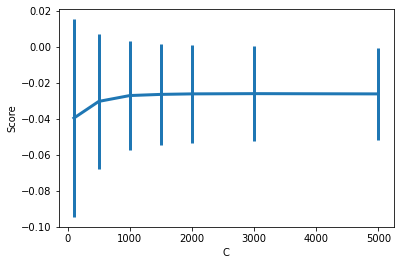

In [4]:
mean_error=[]
std_error=[]
C_range = [100,500,1000,1500, 2000, 3000,5000]
for Cval in C_range:
    model1 = make_pipeline(PolynomialFeatures(5), linear_model.Lasso(alpha=1 / Cval))
    scores = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

In [5]:
C = 2000
model = make_pipeline(PolynomialFeatures(5), linear_model.Lasso(alpha=1/C))
model.fit(X, y)

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

y_pred = model.predict(X)

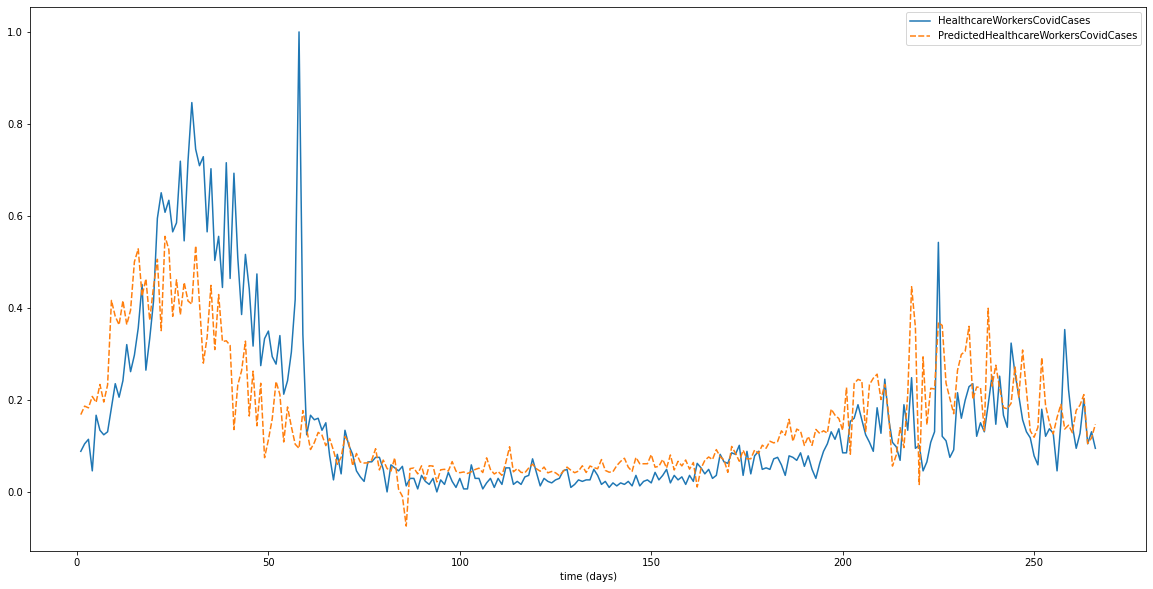

In [6]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases']
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend()
plt.xlabel('time (days)')
plt.show()

In [7]:
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))
mse_train_dummy = mean_squared_error(y_train, dummy.predict(X_train))
mse_test_dummy = mean_squared_error(y_test, dummy.predict(X_test))

print('MSE train (lasso model): {:.5f}\tMSE train (baseline model): {:.5f}'.format(mse_train, mse_train_dummy))
print('MSE test (lasso model): {:.5f}\tMSE train (baseline model): {:.5f}'.format(mse_test, mse_test_dummy))

MSE train (lasso model): 0.01855	MSE train (baseline model): 0.03729
MSE test (lasso model): 0.00676	MSE train (baseline model): 0.02173


### Using new case numbers from previous 7 days to predict healthcare worker cases.

In [8]:
X2 = np.column_stack((X[:-7], X[1:-6], X[2:-5], X[3:-4], X[4:-3], X[5:-2], X[6:-1]))
y2 = y[7:]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

#### Cross Validation

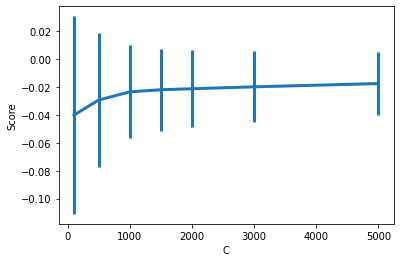

In [9]:
mean_error=[]
std_error=[]
C_range = [100,500,1000,1500, 2000, 3000,5000]
for Cval in C_range:
    #Polynomial features had to be reduced to 3 to maintain a reasonable runtime
    model1 = make_pipeline(PolynomialFeatures(3), linear_model.Lasso(alpha=1 / Cval))
    scores = cross_val_score(model1, X2, y2, cv=5, scoring='neg_mean_squared_error')
    mean_error.append(np.array(scores).mean())
    std_error.append(np.array(scores).std())

plt.errorbar(C_range,mean_error,yerr=std_error,linewidth=3)
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

In [10]:
C = 2000
model = make_pipeline(PolynomialFeatures(5), linear_model.Lasso(alpha=1/C))
model.fit(X2, y2)

y_pred = model.predict(X2)

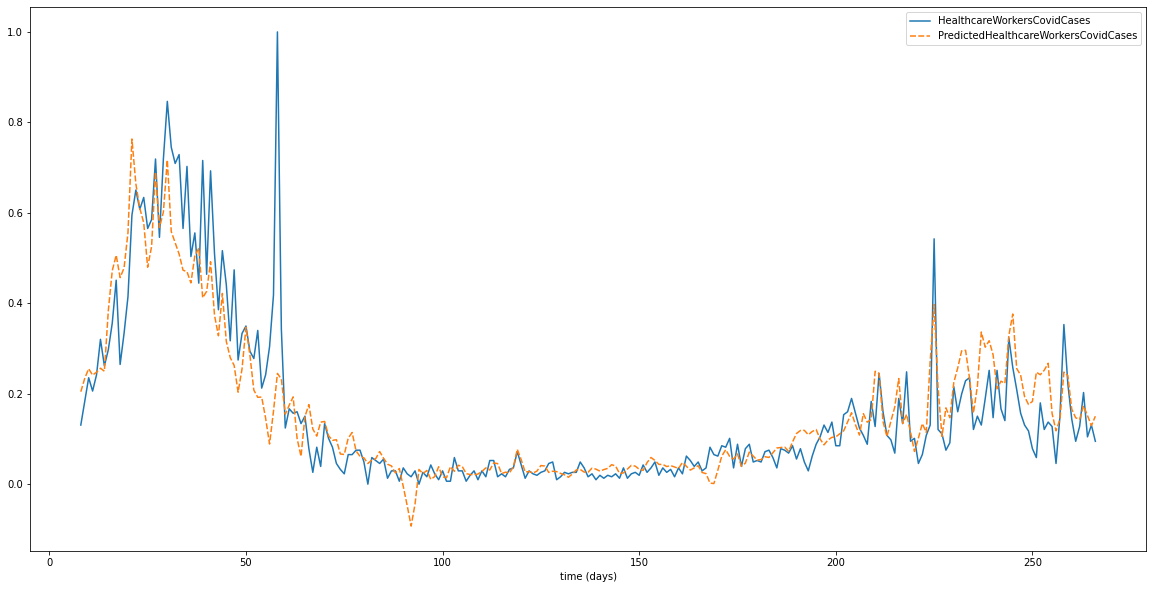

In [11]:
df_new = pd.DataFrame()
df_new['HealthcareWorkersCovidCases'] = df['HealthcareWorkersCovidCases'][7:]
df_new['PredictedHealthcareWorkersCovidCases'] = y_pred

fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new)
plt.legend()
plt.xlabel('time (days)')
plt.show()

In [12]:
mse_train2 = mean_squared_error(y_train, model.predict(X_train))
mse_test2 = mean_squared_error(y_test, model.predict(X_test))
mse_train_dummy2 = mean_squared_error(y_train, dummy.predict(X_train))
mse_test_dummy2 = mean_squared_error(y_test, dummy.predict(X_test))

print('MSE train (lasso model): {:.5f}\tMSE train (baseline model): {:.5f}'.format(mse_train2, mse_train_dummy2))
print('MSE test (lasso model): {:.5f}\tMSE train (baseline model): {:.5f}'.format(mse_test2, mse_test_dummy2))

MSE train (lasso model): 0.00811	MSE train (baseline model): 0.03783
MSE test (lasso model): 0.00366	MSE train (baseline model): 0.02349
